## Assignment-4
### Pradeep Mundlik (AI21BTECH11022)

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize

### Q-1

In [145]:
data = np.array([
[0.417022004703, 0.121328306045, 0.1],
[0.720324493442, 0.849527236006, 0.1],
[0.000114374817345, -1.01701405804, 0.1],
[0.302332572632, -0.391715712054, 0.1],
[0.146755890817, -0.680729552205, 0.1],
[0.0923385947688, -0.748514873007, 0.1],
[0.186260211378, -0.702848628623, 0.1],
[0.345560727043, -0.0749939588554, 0.1],
[0.396767474231, 0.041118449128, 0.1],
[0.538816734003, 0.418206374739, 0.1],
[0.419194514403, 0.104198664639, 0.1],
[0.685219500397, 0.7715919786, 0.1],
[0.204452249732, -0.561583800669, 0.1],
[0.878117436391, 1.43374816145, 0.1],
[0.0273875931979, -0.971263541306, 0.1],
[0.670467510178, 0.843497249235, 0.1],
[0.417304802367, -0.0604131723596, 0.1],
[0.558689828446, 0.389838628615, 0.1],
[0.140386938595, -0.768234900293, 0.1],
[0.198101489085, -0.649073386002, 0.1],
])

X = data[: , 0]
Y = data[: , 1]
sigma_y= data[: , 2]

In [146]:
def linear_fit(x , m , b):
    return m * x + b

def quadratic_fit(x , a , b , c):
    return a * (x**2) + b * x  + c

def cubic_fit(x , a , b , c , d):
    return a * (x**3) + b * (x**2) + c * x + d

In [147]:
def poly_fitting(param,x):
    return sum(k*x**n for (n,k) in enumerate(param))

def log_likelihood(theta, model= poly_fitting):
    Y_fit = model(theta, X)
    return sum(stats.norm.logpdf(*args) for args in zip(Y,Y_fit,sigma_y))

def theta_fit(deg, model= poly_fitting):
    theta_0 = [0] * (deg + 1)
    neg_logLH = lambda theta: - log_likelihood(theta)
    return optimize.fmin_bfgs(neg_logLH, theta_0, disp=False)

def compute_chi2(deg):
    theta = theta_fit(deg)
    val = (Y - poly_fitting(theta, X)) / sigma_y
    return np.sum(val ** 2)

def dof(deg):
    n = len(data)
    return n - deg - 1

def chi_squared_likelihood(deg):
    return stats.chi2(dof(deg)).pdf(compute_chi2(deg))

In [148]:
print(f"Chi square value for degree 1 is {chi_squared_likelihood(1)}")
print(f"Chi square value for degree 2 is {chi_squared_likelihood(2)}")
print(f"Chi square value for degree 3 is {chi_squared_likelihood(3)}")

Chi square value for degree 1 is 0.045383795585920136
Chi square value for degree 2 is 0.03660844755014186
Chi square value for degree 3 is 0.04215280601014605


In [149]:
def log_likelihood(deg, param, X, Y, sigma_y):
    f = [linear_fit, quadratic_fit, cubic_fit]
    y_fit = f[deg-1](X, *param)
    
    return sum(stats.norm.logpdf(*args) for args in zip(Y, y_fit, sigma_y))

def aic(deg, param, X, Y, sigma_y):
    return 2*(deg + 1) - 2*log_likelihood(deg, param, X, Y, sigma_y)

def bic(deg, param, X, Y, sigma_y):
    n = len(X)
    return (deg + 1)*np.log(n) - 2*log_likelihood(deg, param, X, Y, sigma_y)

def aicc(deg, param, X, Y, sigma_y):
    n = len(X)
    return aic(deg, param, X, Y, sigma_y) + (2*(deg + 1)*(deg + 2))/(n - deg - 2)

def error(deg, param):
    f = [linear_fit, quadratic_fit, cubic_fit]
    y_fit = f[deg-1](X, *param)
    return sum(((Y - y_fit)/sigma_y))

def fit(deg, X, Y, sigma_y):
    f = [linear_fit, quadratic_fit, cubic_fit]
    return optimize.curve_fit(f[deg-1], X, Y, sigma=sigma_y)[0]

In [150]:
linear = fit(1, X, Y, sigma_y)
quadratic = fit(2, X, Y, sigma_y)
cubic = fit(3, X, Y, sigma_y)

error_linear = error(1, linear)
error_quadratic = error(2, quadratic)
error_cubic = error(3, cubic)

chi2_linear = np.sum(error_linear ** 2)
chi2_quadratic = np.sum(error_quadratic ** 2)
chi2_cubic = np.sum(error_cubic ** 2)

p_quadratic = 1 - stats.chi2(1).cdf(chi2_linear - chi2_quadratic)
p_cubic = 1 - stats.chi2(2).cdf(chi2_linear - chi2_cubic)

In [151]:
print(f"AIC for linear fit is {aic(1, linear, X, Y, sigma_y)}")
print(f"AIC for quadratic fit is {aic(2, quadratic, X, Y, sigma_y)}")
print(f"AIC for cubic fit is {aic(3, cubic, X, Y, sigma_y)}")

print(f"BIC for linear fit is {bic(1, linear, X, Y, sigma_y)}")
print(f"BIC for quadratic fit is {bic(2, quadratic, X, Y, sigma_y)}")
print(f"BIC for cubic fit is {bic(3, cubic, X, Y, sigma_y)}")

print(f"AICc for linear fit is {aicc(1, linear, X, Y, sigma_y)}")
print(f"AICc for quadratic fit is {aicc(2, quadratic, X, Y, sigma_y)}")
print(f"AICc for cubic fit is {aicc(3, cubic, X, Y, sigma_y)}")

print(f"p value for quadratic fit is {p_quadratic}")
print(f"p value for cubic fit is {p_cubic}")


AIC for linear fit is -40.0366868160727
AIC for quadratic fit is -39.84982062400561
AIC for cubic fit is -38.26081851760256
BIC for linear fit is -38.04522226896472
BIC for quadratic fit is -36.86262380334364
BIC for cubic fit is -34.2778894233866
AICc for linear fit is -39.33080446313153
AICc for quadratic fit is -38.34982062400561
AICc for cubic fit is -35.594151850935894
p value for quadratic fit is 0.9999999999999868
p value for cubic fit is 1.0


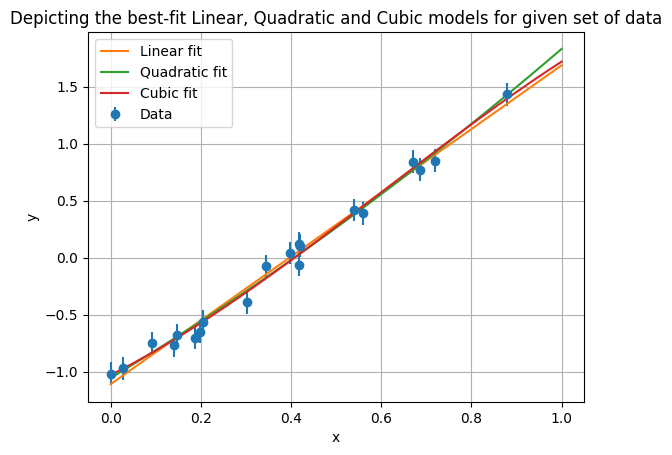

In [152]:
# Plot data and fits
x_values = np.linspace(0, 1, 1000)
plt.errorbar(X, Y, yerr=sigma_y, fmt='o', label='Data')
plt.plot(x_values, linear_fit(x_values, *linear), label='Linear fit')
plt.plot(x_values, quadratic_fit(x_values, *quadratic), label='Quadratic fit')
plt.plot(x_values, cubic_fit(x_values, *cubic), label='Cubic fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Depicting the best-fit Linear, Quadratic and Cubic models for given set of data")
plt.grid()
plt.show()

### Q-2

In [153]:
# data from JDVP
data = np.array([[ 0.42,  0.72,  0.  ,  0.3 ,  0.15,
                   0.09,  0.19,  0.35,  0.4 ,  0.54,
                   0.42,  0.69,  0.2 ,  0.88,  0.03,
                   0.67,  0.42,  0.56,  0.14,  0.2  ],
                 [ 0.33,  0.41, -0.22,  0.01, -0.05,
                  -0.05, -0.12,  0.26,  0.29,  0.39, 
                   0.31,  0.42, -0.01,  0.58, -0.2 ,
                   0.52,  0.15,  0.32, -0.13, -0.09 ],
                 [ 0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1  ]])
X, Y, sigma_y = data

In [154]:
linear = fit(1, X, Y, sigma_y)
quadratic = fit(2, X, Y, sigma_y)

In [155]:
print(f"The value of AIC for Linear Model is {aic(1, linear, X, Y, sigma_y)}")
print(f"The value of AIC for Quadratic Model is {aic(2, quadratic, X, Y, sigma_y)}")
print(f"The value of BIC for Linear Model is {bic(1, linear, X, Y, sigma_y)}")
print(f"The value of BIC for Quadratic Model is {bic(2, quadratic, X, Y, sigma_y)}")
print(f"The value of AICc for Linear Model is {aicc(1, linear, X, Y, sigma_y)}")
print(f"The value of AICc for Quadratic Model is {aicc(2, quadratic, X, Y, sigma_y)}")

The value of AIC for Linear Model is -40.02173401322526
The value of AIC for Quadratic Model is -39.88302717300821
The value of BIC for Linear Model is -38.03026946611728
The value of BIC for Quadratic Model is -36.89583035234624
The value of AICc for Linear Model is -39.31585166028409
The value of AICc for Quadratic Model is -38.38302717300821


### Q-3

**Research Paper**: [The Kolmogorov–Smirnov test for three redshift distributions of long gamma-ray bursts in the Swift Era](https://iopscience.iop.org/article/10.1088/1674-4527/9/1/008/meta)
by Yun-Ming Dong and Tan Lu, published in Research in Astronomy and Astrophysics.

The research conducted by Dong and Lu explores the application of the Kolmogorov-Smirnov (KS) test to analyze three different redshift distributions of long gamma-ray bursts within a specific redshift interval during the Swift Era. They divided the data into five bins and applied the KS test to assess the similarity between these distributions.

Their findings reveal significant KS probabilities for one set of distributions, suggesting that they likely originate from the same underlying distribution within the specified redshift ranges. However, for another set of distributions, the KS probabilities vary across different redshift intervals, indicating that these distributions are distinct and inconsistent, particularly concerning redshift calculations.

This analysis holds relevance for evaluating the validity of established relationships such as the V-Liso and τ-Liso relations in the context of gamma-ray burst observations.

### Q-4

In [156]:
# Higgs boson discovery
p_vals = [10**-1, 10**-2, 10**-3, 10**-5, 10**-7, 10**-9]

print("The corresponding p-values and significance levels (in terms of sigma) are: ")
for p in p_vals:
    print(f"p-value = {p} significance level = {stats.norm.isf(p)}")

The corresponding p-values and significance levels (in terms of sigma) are: 
p-value = 0.1 significance level = 1.2815515655446004
p-value = 0.01 significance level = 2.3263478740408408
p-value = 0.001 significance level = 3.090232306167813
p-value = 1e-05 significance level = 4.264890793922825
p-value = 1e-07 significance level = 5.1993375821928165
p-value = 1e-09 significance level = 5.9978070150076865


In [157]:
ligo_p_value = 2*10**-7
ligo_significance = stats.norm.isf(ligo_p_value)
print(f"For LIGO, the p-value of {ligo_p_value} is {ligo_significance} and the significance(in terms of no. of \u03C3s) is {ligo_significance}")

For LIGO, the p-value of 2e-07 is 5.068957749717791 and the significance(in terms of no. of σs) is 5.068957749717791


In [158]:
chi_square = 65.2
dof = 67
print(f"The chi-square GOF is given by {1 - stats.chi2(dof).cdf(chi_square)}")

The chi-square GOF is given by 0.5394901931099038
